Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from sklearn.preprocessing import StandardScaler

Load the Dataset

In [23]:
data = pd.read_csv('HousingData.csv')
data = data.dropna()
print('Sample data')
print(data.head())

Sample data
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  


Check for Missing Values

In [24]:
print('Missing values in dataset')
print(data.isnull().sum())

Missing values in dataset
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


 Separate Features and Target Variable

In [25]:
x = data.drop("MEDV", axis=1)
y = data['MEDV']

Standardize the Features


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Split the Data into Training and Testing Sets

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


rain the Linear Regression Model

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Make Predictions and Evaluate the Modelt

In [31]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Model Evaluation')
print(f"Mean Squares Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print("r2 secore {r2:.4f}")  

Model Evaluation
Mean Squares Error (MSE): 31.45
Root Mean Squared Error (RMSE): 5.61
r2 secore {r2:.4f}


Plot Actual vs Predicted Home Prices

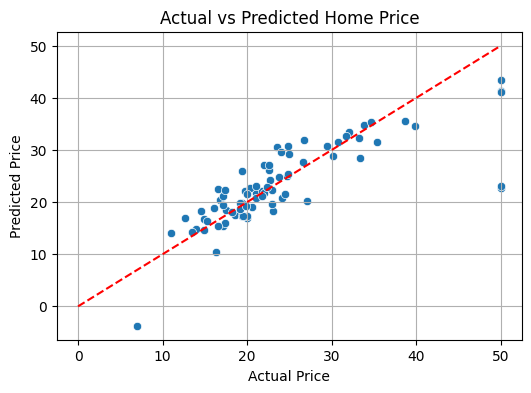

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test,y=y_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual vs Predicted Home Price')
plt.plot([0, 50], [0, 50], "--", color='red')
plt.grid()
plt.show()